In [29]:
library('ISLR')
library('corrplot')

In [7]:
head(Auto, 5)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino


# Question 8

In [17]:
lm.fit =lm(mpg~horsepower, data=Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


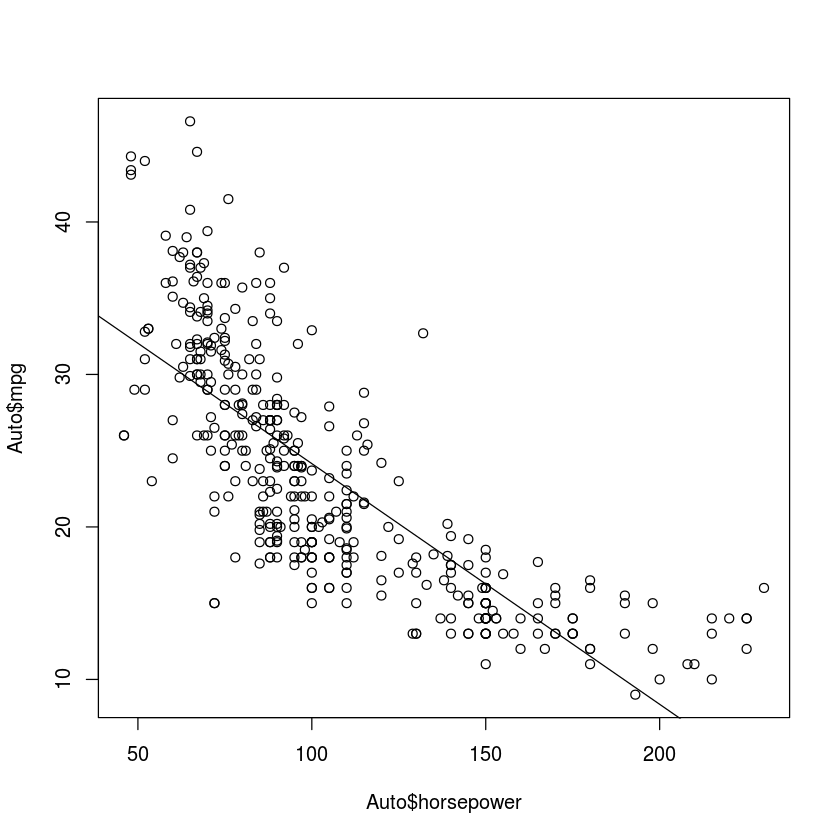

In [18]:
plot(Auto$horsepower, Auto$mpg)
abline(lm.fit)

In [22]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),38.525212,41.3465103
horsepower,-0.170517,-0.1451725


* **i Yes, the t value and Pr clearly indicate there is.**
* **ii  Very strong.**
* **iii Negative, in other words higher horsepower is associated with lower MPG.**
* **iv See below.**

In [25]:
predict(lm.fit, data.frame(horsepower = 9), interval = "confidence")

,fit,lwr,upr
1,38.51526,37.21105,39.81947


# Question 9

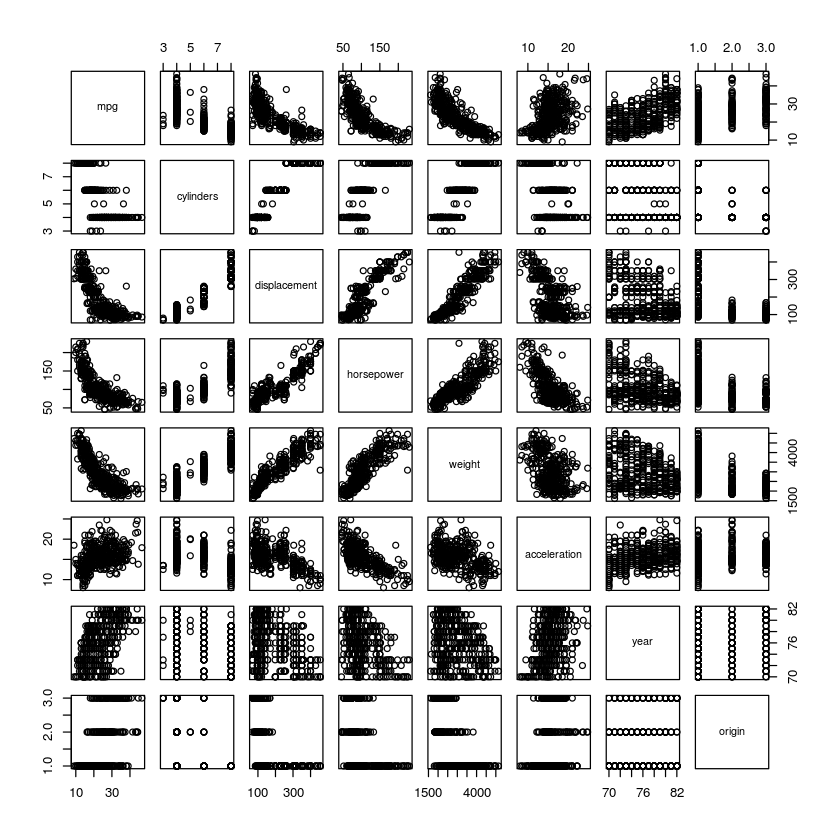

In [27]:
pairs(Auto[,-9])

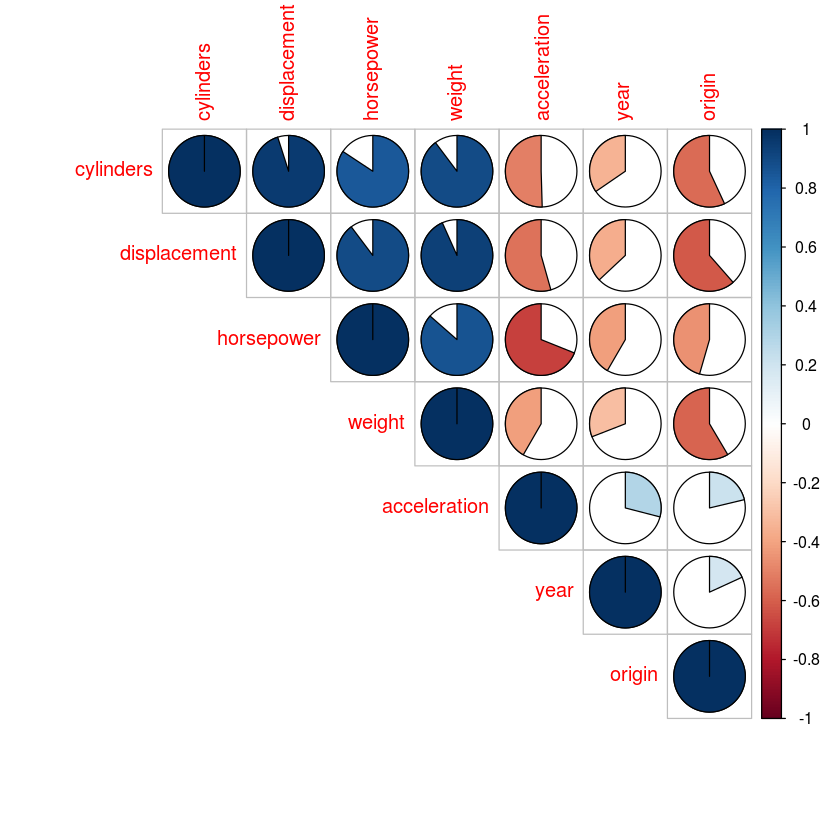

In [32]:
A <- cor(Auto[,2:8])
corrplot(A, method='pie', type='upper')

In [49]:
# origin is factor rather than numeric feature
lm.fit = lm(mpg~cylinders + displacement + horsepower + weight + acceleration + year + factor(origin), data = Auto)

In [50]:
summary(lm.fit)


Call:
lm(formula = mpg ~ cylinders + displacement + horsepower + weight + 
    acceleration + year + factor(origin), data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0095 -2.0785 -0.0982  1.9856 13.3608 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.795e+01  4.677e+00  -3.839 0.000145 ***
cylinders       -4.897e-01  3.212e-01  -1.524 0.128215    
displacement     2.398e-02  7.653e-03   3.133 0.001863 ** 
horsepower      -1.818e-02  1.371e-02  -1.326 0.185488    
weight          -6.710e-03  6.551e-04 -10.243  < 2e-16 ***
acceleration     7.910e-02  9.822e-02   0.805 0.421101    
year             7.770e-01  5.178e-02  15.005  < 2e-16 ***
factor(origin)2  2.630e+00  5.664e-01   4.643 4.72e-06 ***
factor(origin)3  2.853e+00  5.527e-01   5.162 3.93e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.307 on 383 degrees of freedom
Multiple R-squared:  0.8242,	Adjusted R-squar